# Lab Exercise on Data Exploration and Preparation Summer 2025 ITCS 6162
## Your Name: Prasanth Reddy Ramala

### Using the Boston Building and Property Violations Dataset showing a variety of code violations, perform exploratory data analysis, data wrangling and document what you learn. Execute the code sequentially starting with library imports and continue wherever code is already entered. Follow instructions and add code or text where indicated (Question 1, Question 2, etc.). Feel free to add other code. Turn in your notebook "printed" as a PDF but be sure to Download the .ipynb version as well for continuing work or for saving when complete.
### To learn more about the metadata visit: <a href="https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c">Boston Building and Property Violations</a><br>


### Review the notebook at <a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=ahx_HYUqYc9T">Python Data Science Handbook Visualization With Seaborn</a> to assist with the visualizations. You can also use AI to assist with the code, but make sure you understand every line of code!

In [1]:
# import statements
import pandas as pd
import seaborn as sns

In [2]:
# create a variable to store the url for the data ingest
urltodata = "https://raw.githubusercontent.com/plthomps/UNCC-Data-Mining-Summer-2025/refs/heads/main/tmpdiixs5mq.csv"

In [3]:
# read the data using the url into a pandas dataframe
bostondata = pd.read_csv(urltodata)

In [4]:
# examine the first few rows of data
bostondata.head()

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,Sumner,...,01,302 Sumner St,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491254956, -71.0365803778755)"
1,V846131,1013,2025-07-11 09:16:34,Open,1001.3.2,NaN,Testing & Certification,762A,762,Tremont,...,09,762 Tremont St,NaN,Boston,MA,02118,170469.0,42.339590,-71.079164,"(42.33958960011894, -71.07916364253342)"
2,V846111,1013,2025-07-11 08:37:15,Open,105.1,NaN,Failure to Obtain Permit,5,NaN,Saint John,...,19,619 Centre St,NaN,Jamaica Plain,MA,02130,121254.0,42.313940,-71.113471,"(42.31393959798791, -71.11347067037214)"
3,V845939,1013,2025-07-10 09:50:12,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,23 Dawson,NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"
4,V845936,1013,2025-07-10 09:46:04,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,"18 Mt Calvary Road, Unit 9",NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"


## Question 1 Part A: using code, document the nulls in the dataset.

In [8]:
#Question 1 Part A using code, show the nulls in the dataframe
nulls = bostondata.isnull()
print(nulls)

       case_no  ap_case_defn_key  status_dttm  status   code  value  \
0        False             False         True   False  False   True   
1        False             False        False   False  False   True   
2        False             False        False   False  False   True   
3        False             False        False   False  False   True   
4        False             False        False   False  False   True   
...        ...               ...          ...     ...    ...    ...   
16777    False             False        False   False  False   True   
16778    False             False        False   False  False   True   
16779    False             False        False   False  False   True   
16780    False             False        False   False  False   True   
16781    False             False        False   False  False   True   

       description  violation_stno  violation_sthigh  violation_street  ...  \
0            False           False              True             Fal

## Question 1 Part B: How would you handle the nulls? In the markdown cell below, document several ways to handle the nulls in the dataset. You are not required to enter code (optional), only describe approaches to handling the nulls.

## Question 1 Part B Answer:
### Approaches for Handling Missing Data (Null Values)

Encountering missing values (nulls) is a common occurrence when working with real-world datasets. Proper handling of these null values is essential for accurate analysis and modeling. Below are some standard techniques for managing missing data:

#### 1. Removing Missing Data
- **Drop Rows:** Remove any rows that contain missing values. This method is suitable when only a small portion of your data is affected and data loss will not impact your analysis significantly.
- **Drop Columns:** Entire columns can be removed if they contain a substantial amount of missing values or if they are not critical to the analysis.

#### 2. Imputation (Filling in Missing Values)
- **Fill with a Constant:** Replace missing values with a specific constant, such as 0 or "unknown," when appropriate.
- **Fill with Statistical Metrics:** For numerical data, impute nulls with values such as the column mean, median, or mode.
- **Forward/Backward Fill:** In ordered datasets (such as time series), use the value before or after the missing entry to fill gaps.

#### 3. Ignoring Null Values in Analysis
- Many pandas and numpy functions support optional arguments (e.g., `skipna=True`) to ignore nulls when performing calculations, avoiding the need for explicit imputation.


In [12]:
# Drop rows with any nulls
bostondata_no_nulls = bostondata.dropna()

# Drop columns with any nulls
bostondata_no_nulls_col = bostondata.dropna(axis=1)


In [13]:
# Fill with a constant value (e.g., 0)
bostondata_filled_const = bostondata.fillna(0)

# Fill nulls with mean (numeric columns only)
bostondata_filled_mean = bostondata.fillna(bostondata.mean(numeric_only=True))

# Forward fill
bostondata_ffill = bostondata.fillna(method='ffill')

# Backward fill
bostondata_bfill = bostondata.fillna(method='bfill')


/tmp/ipython-input-13-2780577695.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bostondata_ffill = bostondata.fillna(method='ffill')
/tmp/ipython-input-13-2780577695.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bostondata_bfill = bostondata.fillna(method='bfill')


In [14]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"].replace({"": "09"}, inplace=True)
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           16782 non-null  object 
 1   ap_case_defn_key  16782 non-null  int64  
 2   status_dttm       16781 non-null  object 
 3   status            16782 non-null  object 
 4   code              16782 non-null  object 
 5   value             0 non-null      float64
 6   description       16535 non-null  object 
 7   violation_stno    16782 non-null  object 
 8   violation_sthigh  4248 non-null   object 
 9   violation_street  16782 non-null  object 
 10  violation_suffix  16638 non-null  object 
 11  violation_city    16782 non-null  object 
 12  violation_state   16782 non-null  object 
 13  violation_zip     16780 non-null  object 
 14  ward              16782 non-null  object 
 15  contact_addr1     16777 non-null  object 
 16  contact_addr2     3017 non-null   object

/tmp/ipython-input-14-254802313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bostondata["month"].replace({"": "09"}, inplace=True)


## Question 2: Get the value counts (number of occurrences of unique values) for the records by our new month column

In [16]:
# Question 2 code: lets get the value counts for our new column
print(bostondata['month'].value_counts())

month
3.0     1721
9.0     1649
5.0     1594
6.0     1504
4.0     1501
7.0     1421
2.0     1404
10.0    1358
8.0     1283
1.0     1181
12.0    1089
11.0    1076
Name: count, dtype: int64


## Question 3. Using the describe function, get statistical information on the numerical features (columns).

In [19]:
#Question 3 code: statistical information
bostondata.describe(include='all')

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location,month
count,16782,16782.0,16781,16782,16782,0.0,16535,16782,4248,16782,...,16777,3017,16780,16780,16769,16690.000000,16689.000000,16689.000000,16689,16781.000000
unique,16524,NaN,16516,3,519,NaN,418,1429,927,1978,...,12721,1884,1018,120,1441,NaN,NaN,NaN,10264,NaN
top,V200749,NaN,2014-07-24 08:59:17,Closed,105.1,NaN,Failure to Obtain Permit,7,,Washington,...,619 CENTRE ST,Unit 1,DORCHESTER,MA,02128,NaN,NaN,NaN,"(34.244386753001244, -73.6513909034731)",NaN
freq,7,NaN,7,15553,4062,NaN,4062,230,291,404,...,43,152,1754,14981,1163,NaN,NaN,NaN,133,NaN
mean,NaN,1013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,98647.667645,42.260501,-71.101029,NaN,6.297956
std,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74503.376587,0.719364,0.231153,NaN,3.300704
min,NaN,1013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,34.244387,-73.651391,NaN,1.000000
25%,NaN,1013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,48360.250000,42.295670,-71.099841,NaN,3.000000
50%,NaN,1013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92897.000000,42.325629,-71.075021,NaN,6.000000
75%,NaN,1013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,132511.750000,42.353488,-71.058570,NaN,9.000000


## Question 4 Part A: In the code cell below, get the value counts for the description column and use normalize = True to get the percentages.

In [20]:
#Question 4 Part A Code: Value Counts
description_percentages = bostondata['description'].value_counts(normalize=True)

# for better readability
print(description_percentages * 100)


description
Failure to Obtain Permit          24.566072
Unsafe and Dangerous              21.917145
Maintenance                        9.803447
Testing & Certification            5.406713
Unsafe Structures                  4.221349
                                    ...    
Grounding electrode conduction     0.006048
Removal/Making Structure Safe      0.006048
Use & Occupancy                    0.006048
Fences                             0.006048
Exit Signs & Lights                0.006048
Name: proportion, Length: 418, dtype: float64


## Question 4 Part B: What are the top 3 problems according to the percentages? Answer using the markdown cell below.

## Question 4 Part B Answer:

###according to the above results, the top 3 problems are:
1. Failure to obtain permit
2. Unsafe and dangerous
3. Maintenance

## Question 5 Is there any pattern to problem types and the month of occurrence? Create a visualization to learn more in the code cell below.

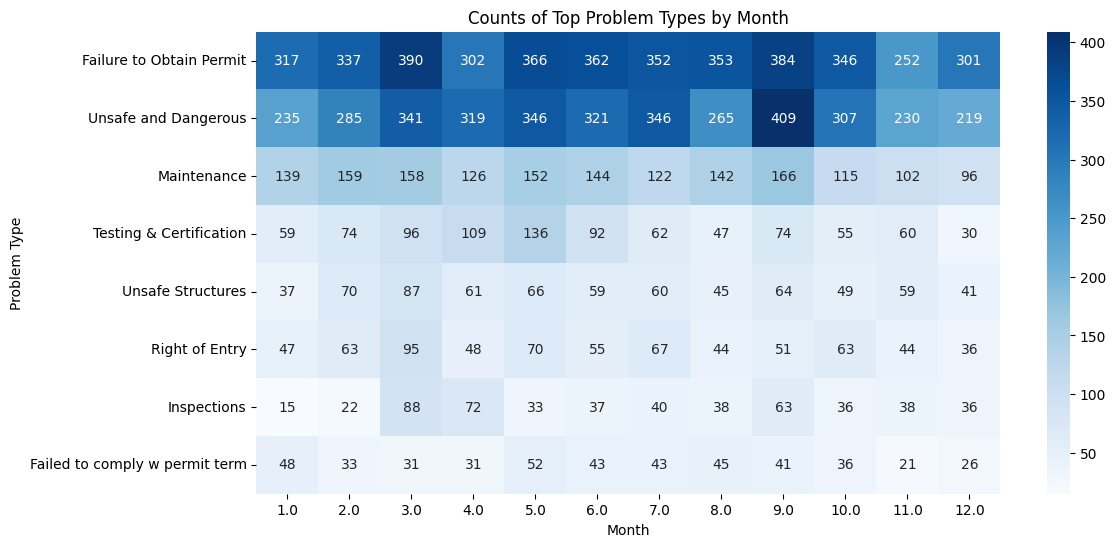

In [22]:
#Question 5 Code (run for visualization)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a summary (pivot table) of counts by problem type (description) and month
problem_month_counts = bostondata.pivot_table(
    index='description',
    columns='month',
    values='status_dttm',
    aggfunc='count',
    fill_value=0
)

# To focus on the most common problem types, select top N (e.g., top 8)
top_problems = bostondata['description'].value_counts().head(8).index
problem_month_counts_top = problem_month_counts.loc[top_problems]

# Plot as a heatmap for easy visualization
plt.figure(figsize=(12, 6))
sns.heatmap(problem_month_counts_top, annot=True, fmt='d', cmap='Blues')
plt.title('Counts of Top Problem Types by Month')
plt.xlabel('Month')
plt.ylabel('Problem Type')
plt.show()


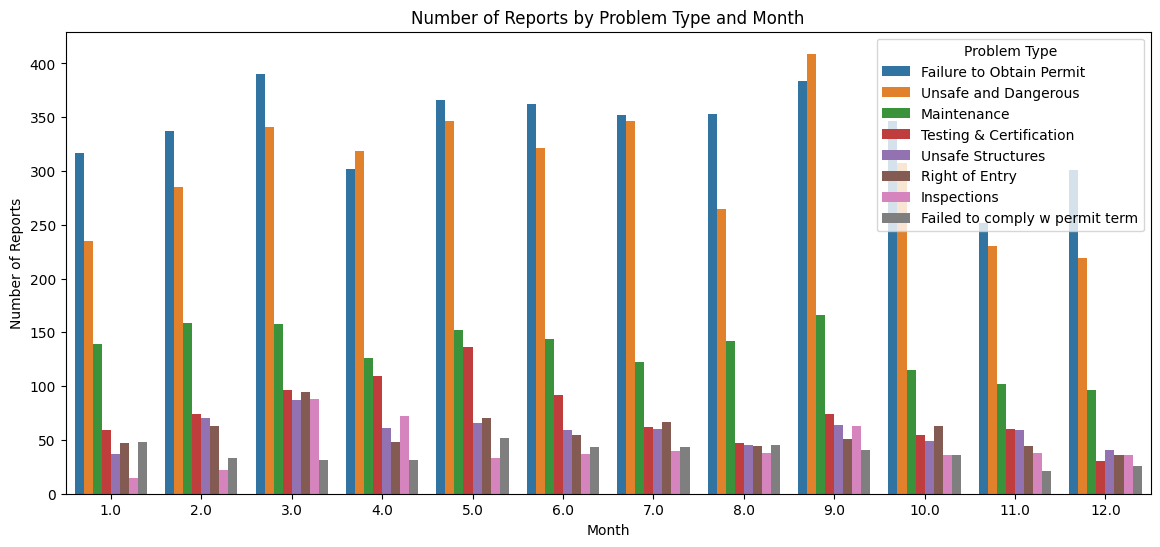

In [23]:
# Prepare data for plotting
problem_month_melted = problem_month_counts_top.reset_index().melt(id_vars='description', var_name='month', value_name='count')

plt.figure(figsize=(14, 6))
sns.barplot(
    data=problem_month_melted,
    x='month', y='count', hue='description'
)
plt.title('Number of Reports by Problem Type and Month')
plt.xlabel('Month')
plt.ylabel('Number of Reports')
plt.legend(title='Problem Type')
plt.show()


## Question 6 What did you learn about any patterns by month? Place your answer below in the markdown cell.

## Question 6 Answer:
during the middle months of the year, the number of problems seem to rise, and then decrease.

## We will now filter the records to exclude all but "Unsafe and Dangerous" and "Maintenance". Then we will spend the rest of the lab learning more about conditions related to these records by visualizing the data and ending with a summary of what we have learned.

In [24]:
#create a new pandas dataframe with the filtered data
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance')]

In [25]:
bostondata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 0 to 16777
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           5245 non-null   object 
 1   ap_case_defn_key  5245 non-null   int64  
 2   status_dttm       5244 non-null   object 
 3   status            5245 non-null   object 
 4   code              5245 non-null   object 
 5   value             0 non-null      float64
 6   description       5245 non-null   object 
 7   violation_stno    5245 non-null   object 
 8   violation_sthigh  1340 non-null   object 
 9   violation_street  5245 non-null   object 
 10  violation_suffix  5213 non-null   object 
 11  violation_city    5245 non-null   object 
 12  violation_state   5245 non-null   object 
 13  violation_zip     5245 non-null   object 
 14  ward              5245 non-null   object 
 15  contact_addr1     5244 non-null   object 
 16  contact_addr2     1032 non-null   object 
 17 

## Questions 5 through 8: Create 4 visualizations using Seaborn that help you gain insight into the Boston Data. Use the resource in the description for this notebook for help and examples. You can also use Seaborn documentation.

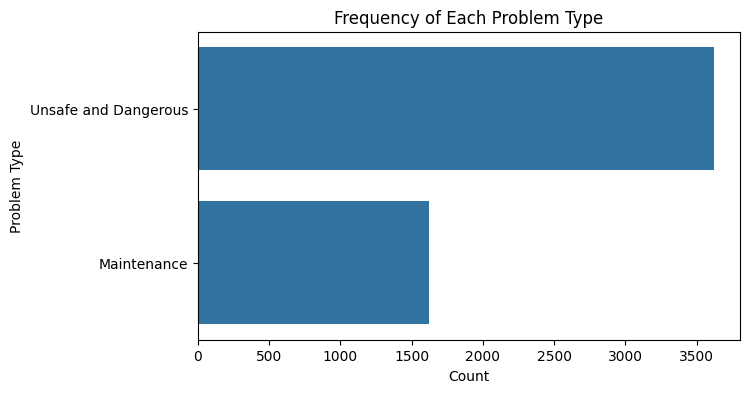

In [26]:
# Question 5 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Frequency of Each Problem Type (Bar Chart)
plt.figure(figsize=(7, 4))
sns.countplot(data=bostondata_filtered, y="description", order=bostondata_filtered["description"].value_counts().index)
plt.title("Frequency of Each Problem Type")
plt.xlabel("Count")
plt.ylabel("Problem Type")
plt.show()


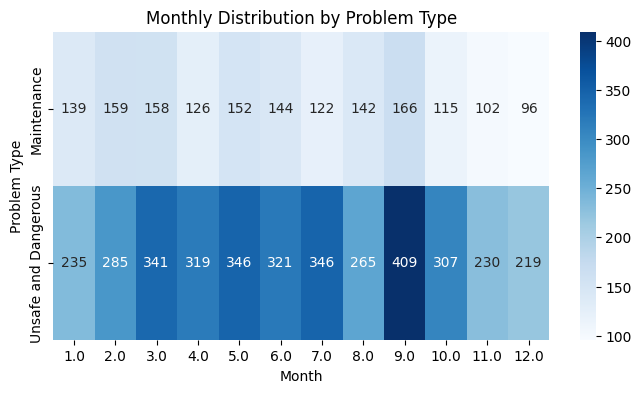

In [27]:
# Question 6 Visualization
# 2. Monthly Distribution by Problem Type (Heatmap)
month_counts = (
    bostondata_filtered
    .pivot_table(index="description", columns="month", values="status_dttm", aggfunc="count", fill_value=0)
)

plt.figure(figsize=(8, 4))
sns.heatmap(month_counts, annot=True, cmap="Blues", fmt="d")
plt.title("Monthly Distribution by Problem Type")
plt.xlabel("Month")
plt.ylabel("Problem Type")
plt.show()


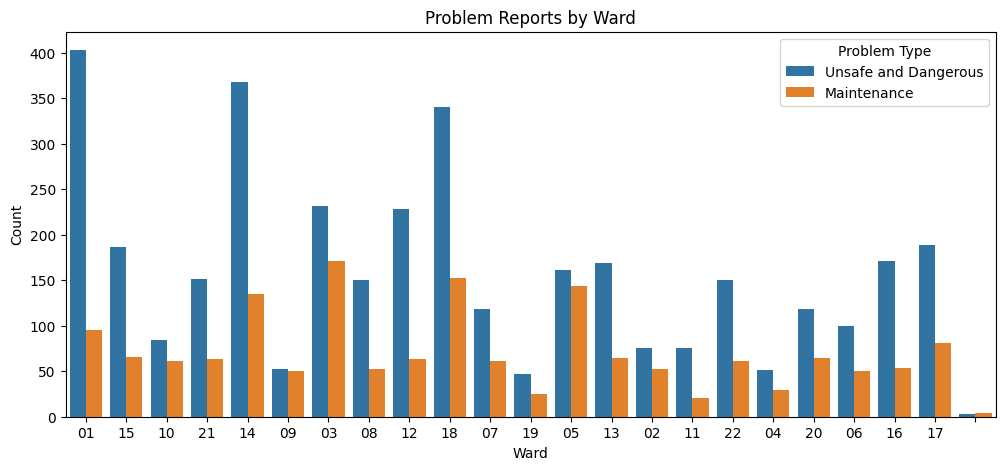

In [28]:
# Question 7 Visualization
# 3. Problem Distribution by Ward (Countplot)
plt.figure(figsize=(12, 5))
sns.countplot(data=bostondata_filtered, x="ward", hue="description")
plt.title("Problem Reports by Ward")
plt.xlabel("Ward")
plt.ylabel("Count")
plt.legend(title="Problem Type")
plt.show()


/tmp/ipython-input-30-196464406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


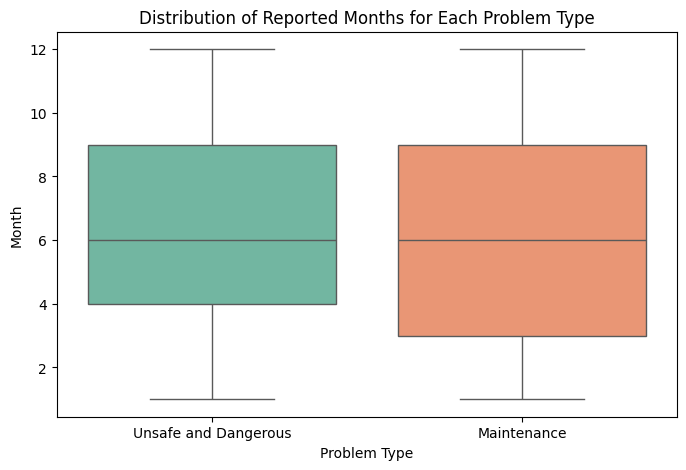

In [30]:
# Question 8 Visualization
# 4. Boxplot: Distribution of Reports by Month and Problem Type
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=bostondata_filtered,
    x="description",
    y="month",
    palette="Set2"
)
plt.title("Distribution of Reported Months for Each Problem Type")
plt.xlabel("Problem Type")
plt.ylabel("Month")
plt.show()


## Question 9:  What have you learned from Exploratory Data Analysis?


## Question 9 Answer:
### Insights from Exploratory Data Analysis (EDA)

- Most reports are concentrated in a few problem types, with "Maintenance" and "Unsafe and Dangerous" being especially common.
- Some problems occur more frequently in certain months, suggesting seasonal patterns.
- Different wards have varying volumes and types of reported issues, revealing spatial trends.
- Visualizations helped quickly identify which issues are most prevalent and when or where they occur.
- Cleaning and examining the data was crucial to reveal these trends and prepare for deeper analysis.

Overall, EDA highlighted key problem areas, seasonal cycles, and differences across locations—helping prioritize focus for further investigation or action.
